<a href="https://colab.research.google.com/github/BirenderPanwar/TSAI_EIP4_Phase1/blob/master/session1/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


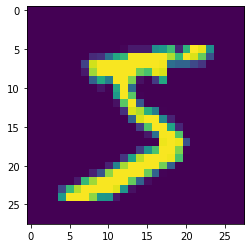

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

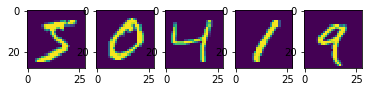

In [5]:
# look for few more images to get the idea of number of pixels network must see to get the gradient/edges extractions
num_images = 5
for index,image in enumerate(X_train[:num_images]):
  plt.subplot(2,num_images,index+1)
  plt.imshow(X_train[index])


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.layers import Activation
model = Sequential(name="model_mnist")

# Block-1 Convolutions
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(28,28,1), use_bias = False, name="blk1_conv_layer1")) # 26X26X32
model.add(Convolution2D(64,(3,3), activation='relu', use_bias = False, name="blk1_conv_layer2")) # 24X24X64
model.add(MaxPooling2D((2,2), name="blk1_maxpool")) # 12X12X64
model.add(Convolution2D(32,(1,1), activation='relu', use_bias = False, name="blk1_conv_layer3")) # 12X12X32

# Block-2 Convolutions
model.add(Convolution2D(32,(3,3), activation='relu', use_bias = False, name="blk2_conv_layer1")) # 10X10X32
model.add(Convolution2D(64,(3,3), activation='relu', use_bias = False, name="blk2_conv_layer2")) # 8X8X64
model.add(Convolution2D(128,(3,3), activation='relu', use_bias = False, name="blk2_conv_layer3")) # 6X6X128
model.add(MaxPooling2D((2,2), name="blk2_maxpool"))  # 3X3X128
model.add(Convolution2D(10,(1,1), activation='relu', use_bias = False, name="blk2_conv_layer4")) # 3X3X10

# Block-3 : just to get 10 channels as we have 10 classes at output
model.add(Convolution2D(10,(3,3), use_bias = False, name="blk3_conv_layer1")) # 1X1X10

model.add(Flatten(name='flatten'))
model.add(Activation('softmax', name="output"))

In [12]:
model.summary()

Model: "model_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
blk1_conv_layer1 (Conv2D)    (None, 26, 26, 32)        288       
_________________________________________________________________
blk1_conv_layer2 (Conv2D)    (None, 24, 24, 64)        18432     
_________________________________________________________________
blk1_maxpool (MaxPooling2D)  (None, 12, 12, 64)        0         
_________________________________________________________________
blk1_conv_layer3 (Conv2D)    (None, 12, 12, 32)        2048      
_________________________________________________________________
blk2_conv_layer1 (Conv2D)    (None, 10, 10, 32)        9216      
_________________________________________________________________
blk2_conv_layer2 (Conv2D)    (None, 8, 8, 64)          18432     
_________________________________________________________________
blk2_conv_layer3 (Conv2D)    (None, 6, 6, 128)         

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=28, nb_epoch=16, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/16





60000/60000 [==============================] - 18s 296us/step - loss: 0.1644 - acc: 0.9489
Epoch 2/16
60000/60000 [==============================] - 15s 248us/step - loss: 0.0530 - acc: 0.9841
Epoch 3/16
60000/60000 [==============================] - 15s 254us/step - loss: 0.0403 - acc: 0.9874
Epoch 4/16
60000/60000 [==============================] - 15s 253us/step - loss: 0.0302 - acc: 0.9906
Epoch 5/16
60000/60000 [==============================] - 15s 253us/step - loss: 0.0251 - acc: 0.9926
Epoch 6/16
60000/60000 [==============================] - 15s 251us/step - loss: 0.0214 - acc: 0.9932
Epoch 7/16
60000/60000 [==============================] - 15s 249us/step - loss: 0.0177 - acc: 0.9941
Epoch 8/16
60000/60000 [==============================] - 15s 243us/step - loss: 0.0158 - acc: 0.9947
Epoch 9/16
60000/60000 [==============================] - 15s 252us/step - loss: 0.0131 - acc: 0.9958
Epoch 10/16
60000/60000 [==============================] - 15s 255us/step -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.02890534537282251, 0.9928]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[1.0048362e-17 1.8369254e-15 4.3658303e-11 3.3806926e-11 6.8691043e-20
  1.8073432e-15 3.3078490e-27 1.0000000e+00 7.2488055e-19 3.2019292e-15]
 [5.6212359e-14 2.2242358e-12 1.0000000e+00 1.4651803e-20 8.1674185e-19
  1.3119344e-24 5.1446870e-18 4.6851239e-21 3.8524306e-17 5.0370036e-27]
 [2.7887935e-13 1.0000000e+00 1.1553079e-08 7.3101620e-15 9.6273274e-09
  3.1407983e-09 1.8165025e-10 5.1099325e-10 2.7495901e-11 3.6255310e-10]
 [1.0000000e+00 1.6792652e-15 7.2197623e-11 2.0961479e-14 1.8396244e-16
  4.6924921e-14 2.4761421e-08 2.0796520e-15 4.4267989e-11 7.3762597e-14]
 [1.3885496e-20 3.8514297e-14 1.8779635e-15 2.0785433e-21 1.0000000e+00
  1.1079541e-17 9.7856883e-17 3.5825978e-16 1.7774625e-13 1.1874650e-13]
 [1.7338203e-15 1.0000000e+00 1.2321875e-09 8.0340877e-17 6.9338646e-10
  8.7515021e-12 3.1662346e-13 1.8540707e-08 5.1830168e-12 1.1729983e-11]
 [9.4291882e-20 8.2095421e-11 2.0749880e-12 8.8670395e-18 1.0000000e+00
  4.8023445e-13 6.8089734e-19 1.4719917e-10 1.1665999e-10 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

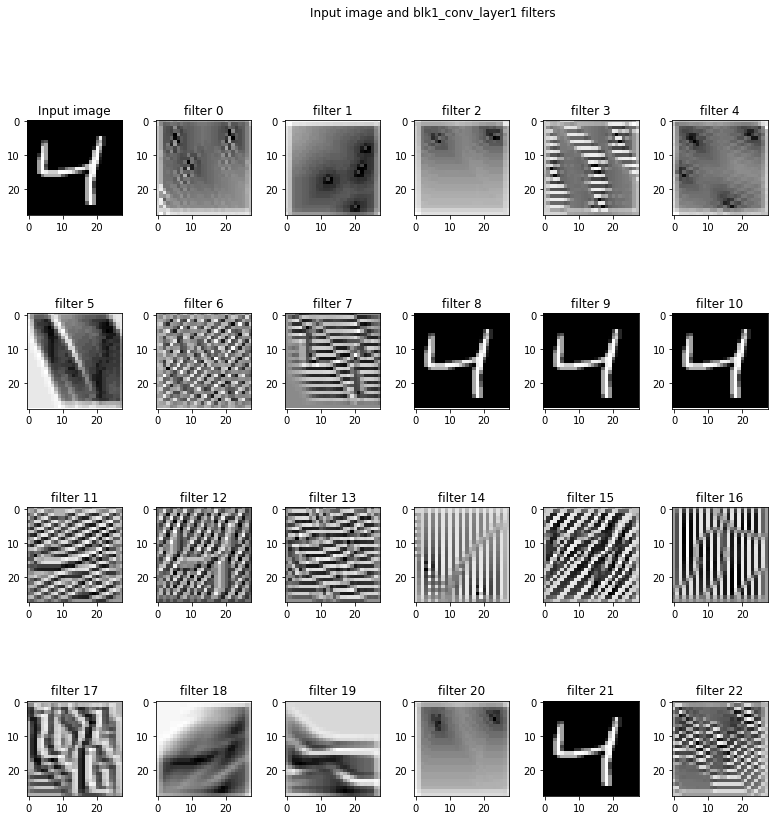

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'blk1_conv_layer1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()